# Diabetes Prediction Model

In [66]:
import pandas as pd
import sqlalchemy
import mysql.connector
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Creating a Database Connection

In [67]:
# Create a MySQL Connection
mysql_connection = mysql.connector.connect(user = 'root', host = 'localhost', password = 'Mwende#2001!', database = 'rest_api')
if mysql_connection.is_connected():
    print("Hongera! Connection successful.")

else:
    print("Oops! Connection unsuccessful, try again.")

Hongera! Connection successful.


In [68]:
# Quering data and adding it to a dataframe.
query = "SELECT * FROM DIABETES;"
diabetes_data = pd.read_sql(query, mysql_connection)
print("Data loaded successfully.")

Data loaded successfully.


C:\Users\PC\AppData\Local\Temp\ipykernel_11448\592648769.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  diabetes_data = pd.read_sql(query, mysql_connection)


In [69]:
# Loading the second dataset 
query_2 = "SELECT * FROM DIABETES_PREDICTION_DATASET;"
diabetes_data2 = pd.read_sql(query_2, mysql_connection)
if diabetes_data2.empty:
    print('Mission incomplete.')

else:
    print('Mission successfully completed!')

C:\Users\PC\AppData\Local\Temp\ipykernel_11448\3793410213.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  diabetes_data2 = pd.read_sql(query_2, mysql_connection)


Mission successfully completed!


In [70]:
# Closing the connection
mysql_connection.close()
print("Connection closed.")

Connection closed.


# Processes to undertake in this notebook:

1.*Exploratory Data Analysis*

2.*Feature Engineering*

3.*Feature Selection*

4.*Model Building*

5.*Model Deployment*


## Exploratory Data Analysis 

- The main aim is to understand the dataset better.

**To-Analyze**
1. Missing values.

2. Check for numerical variables.

3. Check for Categorical variables.

4. Distribution of the variables.

5. Check for outliers.

6. Relationship between the independent variables and dependent variable (Outcome)

In [71]:
# Checking a random sample of the dataset
diabetes_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
419,3,129,64,29,115,26.4,0.219,28,1
126,3,120,70,30,135,42.9,0.452,30,0
704,4,110,76,20,100,28.4,0.118,27,0
108,3,83,58,31,18,34.3,0.336,25,0
431,3,89,74,16,85,30.4,0.551,38,0
145,0,102,75,23,0,0.0,0.572,21,0
132,3,170,64,37,225,34.5,0.356,30,1
443,8,108,70,0,0,30.5,0.955,33,1
548,1,164,82,43,67,32.8,0.341,50,0
623,0,94,70,27,115,43.5,0.347,21,0


In [72]:
# Checking for missing values
diabetes_data.isnull().sum()

for feature in diabetes_data:
    print(feature, np.round(diabetes_data[feature].isnull().mean(), 1),'%')

Pregnancies 0.0 %
Glucose 0.0 %
BloodPressure 0.0 %
SkinThickness 0.0 %
Insulin 0.0 %
BMI 0.0 %
DiabetesPedigreeFunction 0.0 %
Age 0.0 %
Outcome 0.0 %


In [73]:
print(f"The total rows in the dataset are {len(diabetes_data['Outcome'])}.")

The total rows in the dataset are 768.


### Numerical Variables

In [74]:
numerical_columns = []
for feature in diabetes_data:
    if diabetes_data[feature].dtype != 'object':
        numerical_columns.append(feature)


print(f"There are {len(numerical_columns)} numerical columns.")

There are 9 numerical columns.


In [75]:
print(numerical_columns)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


### Continuous Variables

In [76]:
numerical_columns = []
for feature in diabetes_data:
    if diabetes_data[feature].dtype == 'object':
        numerical_columns.append(feature)


print(f"There are {len(numerical_columns)} categorical columns.")

There are 0 categorical columns.


### Multivariate Analysis

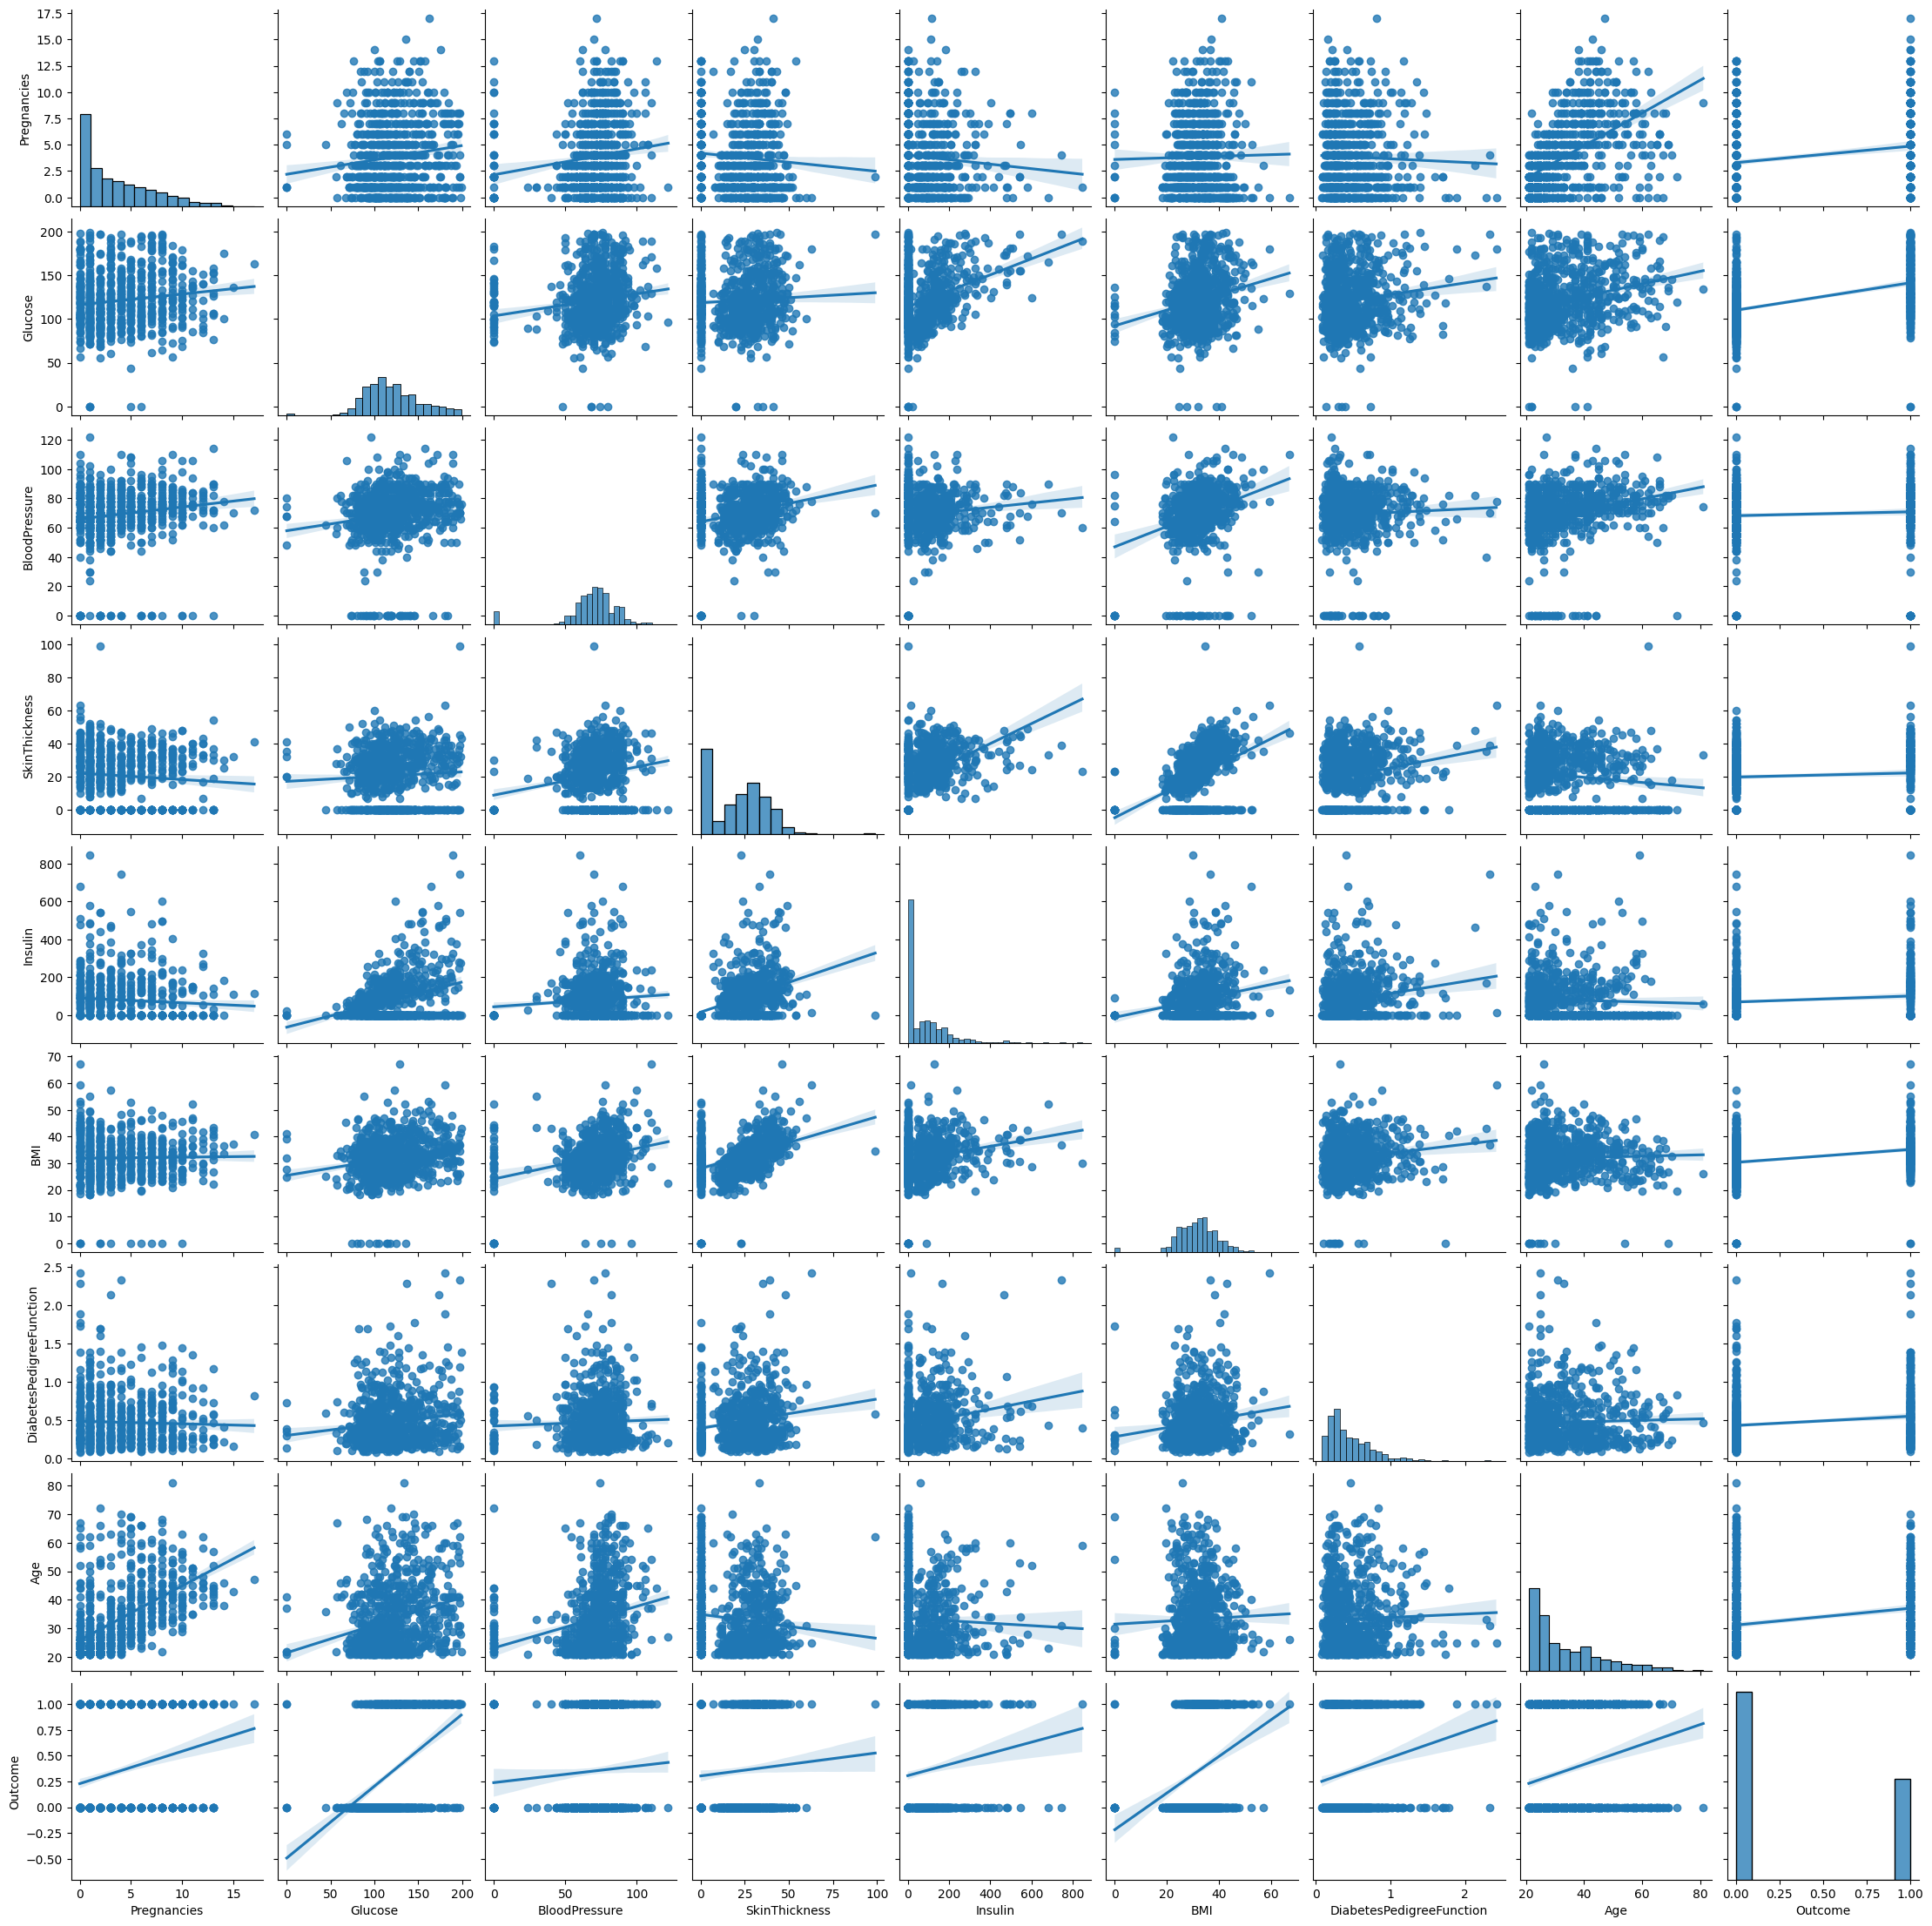

In [77]:
sns.pairplot(data=diabetes_data, kind='reg')

In [78]:
# Correlation
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Outliers
- Methods to detect outliers are:

a) Z-Score Method

b) Inter-quartile Range Method (IQR)

c) Percentile Method

- To remove outliers, two methods can be used. 

i) Capping. This is converting the outliers to uper and lower limits.

ii) Trimming. Deleting the outliers.

In [79]:
# Detecting outliers per column using Z-score 

for column in diabetes_data:

    upper_limit = diabetes_data[column].mean() + 3 * diabetes_data[column].std()
    lower_limit =  diabetes_data[column].mean() - 3 * diabetes_data[column].std()

    print(f"Upper Limit for {column}, {upper_limit}")
    print(f"Lower Limit for {column}, {lower_limit}")

    outliers = diabetes_data.loc[(diabetes_data[column] > upper_limit) | (diabetes_data[column] < lower_limit)]

    total_outliers_per_column = len(outliers)

    print(f"Total number of outliers in {column}: {total_outliers_per_column}")


Upper Limit for Pregnancies, 13.953786271429943
Lower Limit for Pregnancies, -6.263682104763275
Total number of outliers in Pregnancies: 4
Upper Limit for Glucose, 216.81238583540866
Lower Limit for Glucose, 24.976676664591338
Total number of outliers in Glucose: 5
Upper Limit for BloodPressure, 127.17289026193433
Lower Limit for BloodPressure, 11.038047238065673
Total number of outliers in BloodPressure: 35
Upper Limit for SkinThickness, 68.39311103651625
Lower Limit for SkinThickness, -27.320194369849577
Total number of outliers in SkinThickness: 1
Upper Limit for Insulin, 425.5314862206812
Lower Limit for Insulin, -265.9325278873478
Total number of outliers in Insulin: 18
Upper Limit for BMI, 55.64505908612634
Lower Limit for BMI, 8.340097163873661
Total number of outliers in BMI: 14
Upper Limit for DiabetesPedigreeFunction, 1.4658620871216579
Lower Limit for DiabetesPedigreeFunction, -0.5221094829549915
Total number of outliers in DiabetesPedigreeFunction: 11
Upper Limit for Age, 6

In [80]:
# Capping the outliers
# Creating a copy of the dataset
diabetes_data_copy = diabetes_data.copy()

# Performing the capping
for column in diabetes_data_copy:

    diabetes_data_copy.loc[diabetes_data_copy[column] > upper_limit, column] = upper_limit
    diabetes_data_copy.loc[diabetes_data_copy[column] < lower_limit, column] = lower_limit

    outliers = diabetes_data_copy.loc[(diabetes_data_copy[column] > upper_limit) | (diabetes_data_copy[column] < lower_limit)]

    total_outliers_per_column = len(outliers)

    print(f"Total number of outliers in {column}: {total_outliers_per_column}")


Total number of outliers in Pregnancies: 0
Total number of outliers in Glucose: 0
Total number of outliers in BloodPressure: 0
Total number of outliers in SkinThickness: 0
Total number of outliers in Insulin: 0
Total number of outliers in BMI: 0
Total number of outliers in DiabetesPedigreeFunction: 0
Total number of outliers in Age: 0
Total number of outliers in Outcome: 0


## Feature Engineering

- Consists of:

i) Handling imbalance datasets

ii) Encoding

iii) Min-Max Scaling

iv) Dimensionality

v)Log Transformation

vi) Normalization

vii) Standardization

viii) Feature Selection

### Handling an Imbalanced Dataset
The library to be used is imbalance-learn.

([<matplotlib.patches.Wedge at 0x234c361c090>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0.0'),
  Text(0.5025944158780503, -0.9784676045369114, '1.0')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.1%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.9%')])

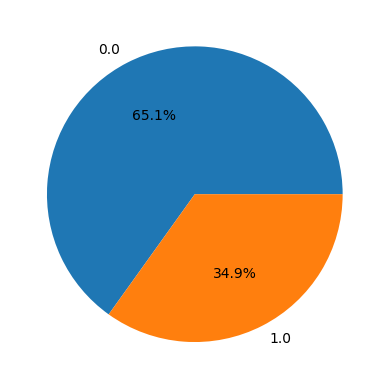

In [81]:
outcome_value_counts = diabetes_data_copy['Outcome'].value_counts()

plt.pie(outcome_value_counts, labels=outcome_value_counts.index, autopct='%1.1f%%')

Using the outcome below, it clearly shows that the '0' outcome is the majority with 65.1% while the '1' outcome has a 34.9% turnout. This makes the dataset imbalanced.

In [82]:
X = diabetes_data_copy.drop(['Outcome'], axis=1)
y = diabetes_data_copy['Outcome']

In [83]:
# Handling imbalance by using Random Undersampling
Random = imblearn.over_sampling.SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=None, n_jobs=None) 

In [84]:
X_resampled, y_resampled = Random.fit_resample(X, y)

In [85]:
print(f'This is y total values {y.value_counts()}')

This is y total values Outcome
0.0    500
1.0    268
Name: count, dtype: int64


In [86]:
print(f'This is y_resampled total values {y_resampled.value_counts()}')

This is y_resampled total values Outcome
1.0    500
0.0    500
Name: count, dtype: int64


In [87]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [88]:

for k in X_resampled:
    print(k, X_resampled[k].unique())


Pregnancies [1.77981247 1.         0.         1.74947976 1.03795395 1.01122048
 0.62056154 1.75045825 0.16195084 0.61550918]
Glucose [1.77981247 0.         1.62803797 1.46198787]
BloodPressure [1.77981247 0.        ]
SkinThickness [1.77981247 0.        ]
Insulin [0.         1.77981247]
BMI [1.77981247 0.         1.52327571]
DiabetesPedigreeFunction [0.627      0.351      0.672      0.167      1.77981247 0.201
 0.248      0.134      0.158      0.232      0.191      0.537
 1.441      0.398      0.587      0.484      0.551      0.254
 0.183      0.529      0.704      0.388      0.451      0.263
 0.205      0.257      0.487      0.245      0.337      0.546
 0.851      0.267      0.188      0.512      0.966      0.42
 0.665      0.503      1.39       0.271      0.696      0.235
 0.721      0.294      0.564      0.586      0.344      0.305
 0.491      0.526      0.342      0.467      0.718      0.962
 0.173      0.304      0.27       0.699      0.258      0.203
 0.855      0.845      0.334  

## Feature Selection

In [90]:
# Model Creation with all the features
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(class_weight='balanced', n_estimators=100)

# Fitting the model
rfc.fit(X_train, y_train)

# Making predictions
preds = rfc.predict(X_test)

# Evaluate the model using the F1-score
f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)

print(f1_score_all)

0.614


### Recursive Feature Algorithm

In [91]:

rfe_f1_score_list = []
# Perfoem the Recursive Feature Technique
for feature in range (1, 9):
    RFESelector = RFE(estimator=rfc, n_features_to_select=feature, step=1)
    RFESelector.fit(X_train, y_train)

    #Filter the columns 
    filt_X_train = RFESelector.transform(X_train)
    filt_X_test = RFESelector.transform(X_test)

    #Fit the model
    rfc.fit(filt_X_train, y_train)
    #Prediction
    predictions = rfc.predict(filt_X_test)

    f1_score_rfe = round(f1_score(y_test, predictions, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)


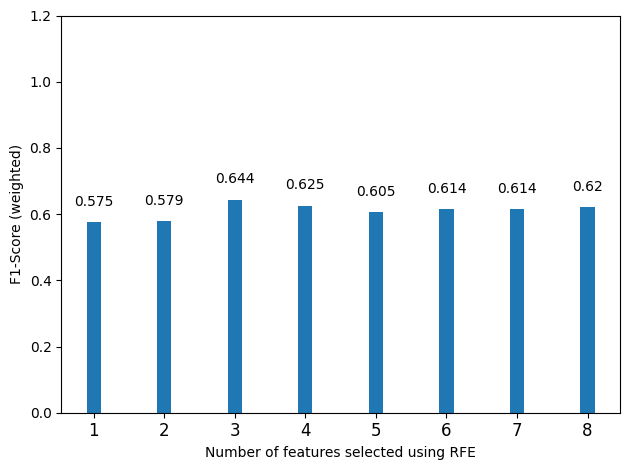

In [92]:
fig, ax = plt.subplots()

x = np.arange(1, 9)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 9))
ax.set_xticklabels(np.arange(1, 9), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [105]:
RFE_selector = RFE(estimator=rfc, n_features_to_select=3)
RFE_selector.fit(X_train, y_train)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train.columns[selected_features_mask]
selected_features

Index(['Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction'], dtype='object')

## Model Creation

In [106]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rfc.fit(X_train_selected, y_train)

predictions = rfc.predict(X_test_selected)

f1_score_predictions = round(f1_score(y_test, predictions, average='weighted'), 3)
f1_score_predictions

0.644

## Model Deployment